# EDA EN R - Un ejemplo práctico

El análisis exploratorio de datos (EDA por sus siglas en inglés) implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender acerca del conjunto de datos antes de aplicar técnicas estadísticas o de modelado más avanzadas. A continuación, se presenta un ejemplo práctico de EDA utilizando R y el conjunto de datos "Melanoma", que está incluido en la biblioteca `MASS`.

In [1]:
library(MASS)
data("Melanoma")

### 1. Recodificación de variables.
A través del comando `help` podemos ver la descripción del conjunto de datos Melanoma:


In [ ]:
help(Melanoma) # Se muestra en la pestaña de Ayuda de Positron.

Si se ejecuta una visualización de la base con la función `str` se puede observar que:    

- las variables status, sex, y ulcer requieren codificación, 
- R la está leyendo como variables numéricas cuando deberías ser factores.

También se puede utilizar la función `vis_dat` de la librería `visdat`. Esta función muestra gráficamente la estructura del data frame.

In [4]:
install.packages("visdat") # Si lo requiere

# Downloading packages -------------------------------------------------------
- Downloading visdat from CRAN ...              OK [1.3 Mb in 0.29s]
- Downloading readr from CRAN ...               OK [292.2 Kb in 0.17s]
- Downloading clipr from CRAN ...               OK [21.4 Kb in 0.12s]
- Downloading crayon from CRAN ...              OK [39.4 Kb in 0.24s]
- Downloading hms from CRAN ...                 OK [43.7 Kb in 0.16s]
- Downloading vroom from CRAN ...               OK [613.4 Kb in 0.17s]
- Downloading bit64 from CRAN ...               OK [138.7 Kb in 0.14s]
- Downloading bit from CRAN ...                 OK [297.4 Kb in 0.15s]
- Downloading tzdb from CRAN ...                OK [586.6 Kb in 0.16s]
- Downloading progress from CRAN ...            OK [29.8 Kb in 0.14s]
- Downloading prettyunits from CRAN ...         OK [95.2 Kb in 0.12s]
- Downloading forcats from CRAN ...             OK [287.7 Kb in 0.17s]
Successfully downloaded 12 packages in 5.8 seconds.

The following package(s

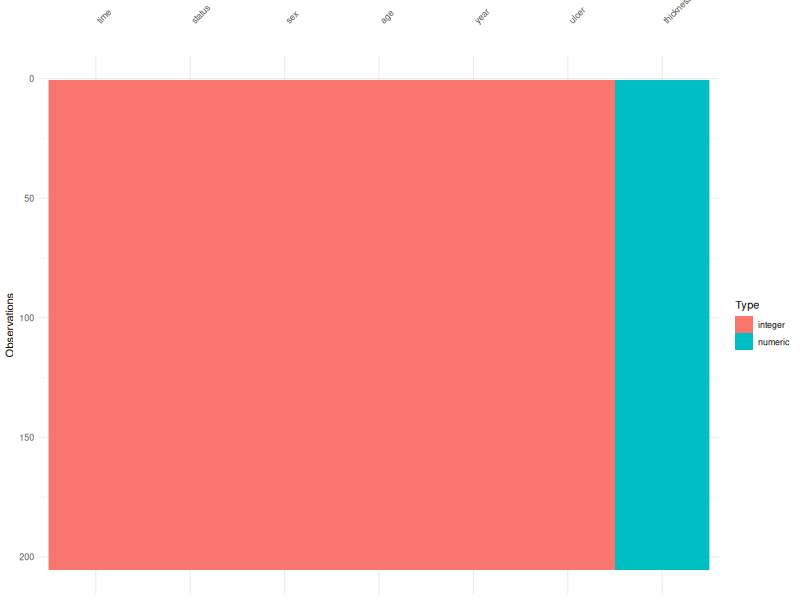

In [5]:
visdat::vis_dat(Melanoma)

Recodificamos las variables y las transformamos en un factor

In [6]:
Melanoma$status2 <- factor(Melanoma$status,
                          levels=c(1,2,3), # Si los niveles están ordenado se puede omitir
                          labels = c("died from melanoma", "alive", "dead from other causes"))
Melanoma$ulcer <- factor(Melanoma$ulcer,levels = c(1,0),
                         labels = c("presence", "absence"))
Melanoma$sex<-factor(Melanoma$sex,                   
                 levels=c(1,0),
                 labels=c("male","famale"))

La función `factor` permite cambiar una variable a factor y para este caso concreto, establecer etiquetas para los valores numéricos.    

Observar como se cambia directamente los objetos en la base de datos, sin embargo, se crea una variable **status2** para conservar la original.

Una vez realizado el cambio de la codificación de los factores se comprueba la estructura de la base utilizando la función `str`

In [7]:
str(Melanoma)

'data.frame':	205 obs. of  8 variables:
 $ time     : int  10 30 35 99 185 204 210 232 232 279 ...
 $ status   : int  3 3 2 3 1 1 1 3 1 1 ...
 $ sex      : Factor w/ 2 levels "male","famale": 1 1 1 2 1 1 1 2 1 2 ...
 $ age      : int  76 56 41 71 52 28 77 60 49 68 ...
 $ year     : int  1972 1968 1977 1968 1965 1971 1972 1974 1968 1971 ...
 $ thickness: num  6.76 0.65 1.34 2.9 12.08 ...
 $ ulcer    : Factor w/ 2 levels "presence","absence": 1 2 2 2 1 1 1 1 1 1 ...
 $ status2  : Factor w/ 3 levels "died from melanoma",..: 3 3 2 3 1 1 1 3 1 1 ...


Si se grafica de nuevo la estructura con `vis_dat`, se observa que las variables que se han modificado ahora son factores.   

```R
install.packages("visdat") # Si lo requiere
```

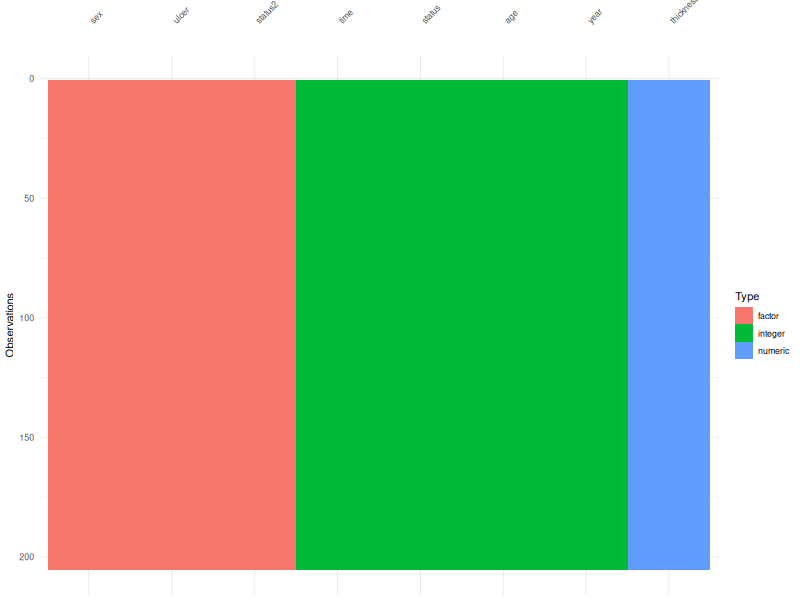

In [8]:
visdat::vis_dat(Melanoma)

### 2. Indentificación de errores y valores perdidos

Para la identificación de errores y valores perdidos tenemos varias opciones: utilizar la función `summary`, hacer gráficos en las variables cuantitativas y preguntar a R directamente si existen valores perdidos.

In [9]:
summary(Melanoma)

      time          status         sex           age             year        thickness          ulcer    
 Min.   :  10   Min.   :1.00   male  : 79   Min.   : 4.00   Min.   :1962   Min.   : 0.10   presence: 90  
 1st Qu.:1525   1st Qu.:1.00   famale:126   1st Qu.:42.00   1st Qu.:1968   1st Qu.: 0.97   absence :115  
 Median :2005   Median :2.00                Median :54.00   Median :1970   Median : 1.94                 
 Mean   :2153   Mean   :1.79                Mean   :52.46   Mean   :1970   Mean   : 2.92                 
 3rd Qu.:3042   3rd Qu.:2.00                3rd Qu.:65.00   3rd Qu.:1972   3rd Qu.: 3.56                 
 Max.   :5565   Max.   :3.00                Max.   :95.00   Max.   :1977   Max.   :17.42                 
                   status2   
 died from melanoma    : 57  
 alive                 :134  
 dead from other causes: 14  
                             
                             
                             

Para comprobar la existencia de valores perdidos en la base de datos se puede utilizar la función `is.na` junto con la función `colSums` para obtener el número de valores perdidos por cada variable.

In [13]:
colSums(is.na(Melanoma))

     time    status       sex       age      year thickness     ulcer   status2 
        0         0         0         0         0         0         0         0 

En la salida anterior se observa que no existen valores perdidos en ninguna de las variables del conjunto de datos.   

También se puede mostrar el total de valores perdidos en todo el conjunto de datos utilizando la función `sum` junto con `is.na`, tal y como se muestra a continuación:

In [15]:
sum(is.na(Melanoma))

[1] 0

Es posible identificar errores empleando gráficos de tipo boxplot para las variables cuantitativas.

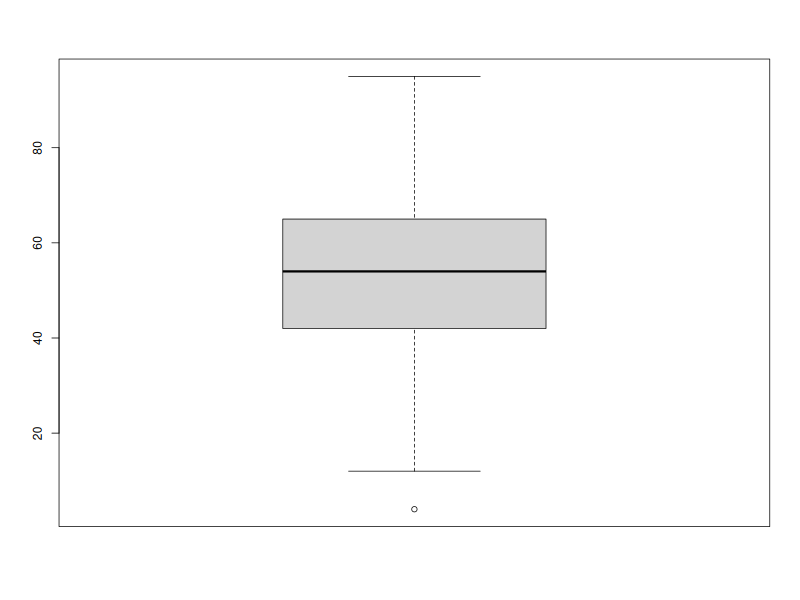

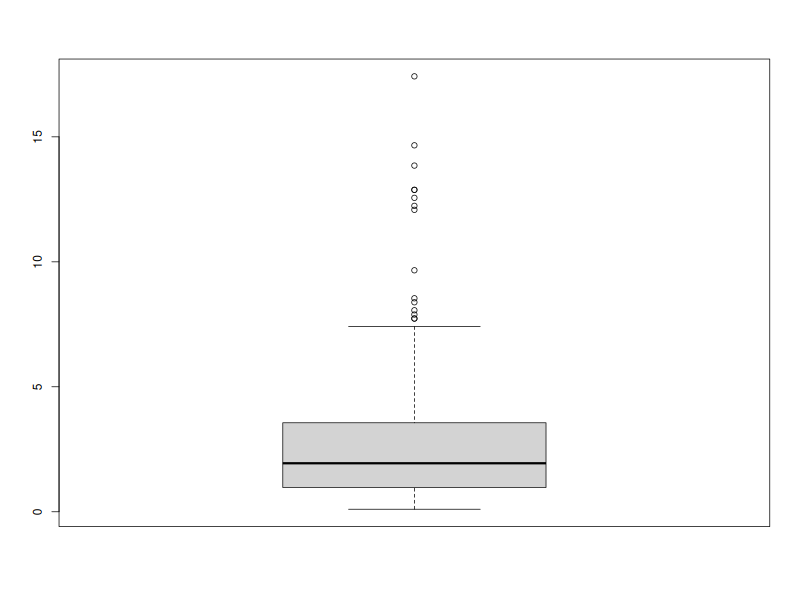

$age
$age$stats
     [,1]
[1,]   12
[2,]   42
[3,]   54
[4,]   65
[5,]   95

$age$n
[1] 205

$age$conf
        [,1]
[1,] 51.4619
[2,] 56.5381

$age$out
174 
  4 

$age$group
[1] 1

$age$names
[1] "1"


$thickness
$thickness$stats
     [,1]
[1,] 0.10
[2,] 0.97
[3,] 1.94
[4,] 3.56
[5,] 7.41

$thickness$n
[1] 205

$thickness$conf
         [,1]
[1,] 1.654188
[2,] 2.225812

$thickness$out
    5     9    16    20    21    27    35    43    48    98   100   123   141   190   191 
12.08 12.88 12.56  7.73 13.85  8.54 14.66 17.42  8.38  7.73 12.88  9.66  7.89 12.24  8.06 

$thickness$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$thickness$names
[1] "1"



In [ ]:
apply(Melanoma[,c(4,6)],2,boxplot) # Boxplot para la variable numérica que se corresponde con la columna 4 y 6, que son "thickness" y "age"

### 3. Normalidad de los datos

Evaluar la normalidad puede ayudar, entre otras cosas, para conocer cual es la manera correcta de presentar y analizar los resultados. Para evaluar la normalidad se puede utilizar gráficos y pruebas de normalidad.

Para evaluar la normalidad gráficamente se puede hacer uso de la función `qqPlot` de la librería `car`.

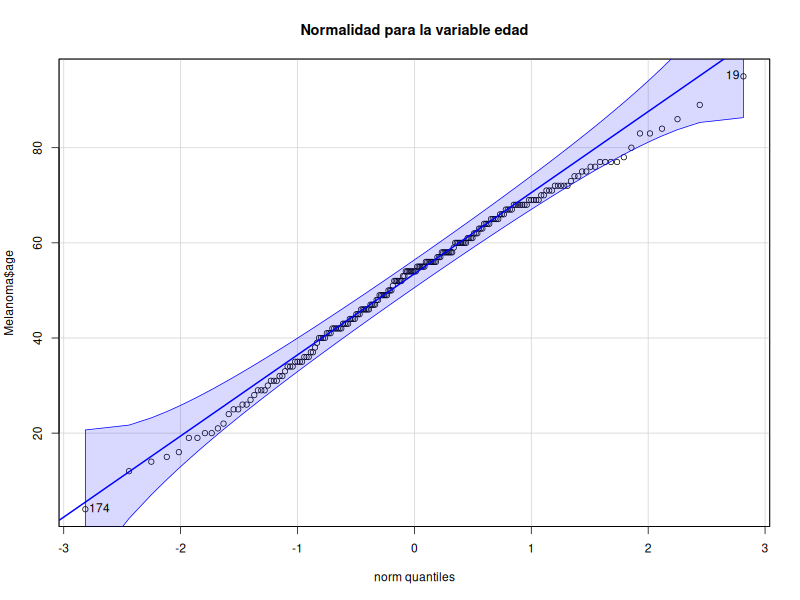

[1] 174  19

In [24]:
car::qqPlot(Melanoma$age, main="Normalidad para la variable edad")

La gráfica anterior refleja que los datos no tienen una distribución normal, puesto que no todos los puntos se encuentran sobre la línea diagonal, aunque se observa una tendencia lineal.

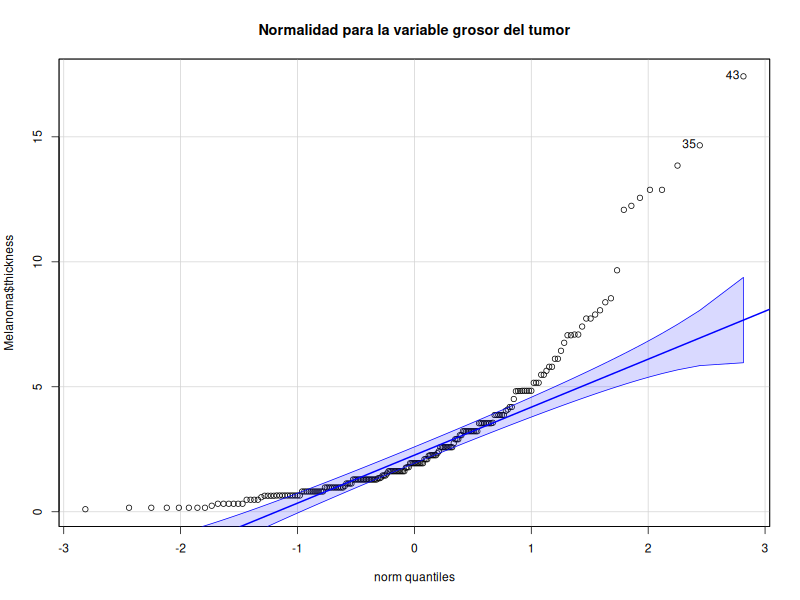

[1] 43 35

In [25]:
Melanoma$thickness |>
  car::qqPlot(main="Normalidad para la variable grosor del tumor")

En esta nueva gráfica sobre la normalidad de la variable `thickness` se observa que los puntos se alejan de la línea diagonal en los extremos, lo que indica que la variable tampoco sigue una distribución normal.

Podemos, a continuación, analizar cada variable cuantitativa del conjunto de datos Melanoma, visualizando sus histogramas.

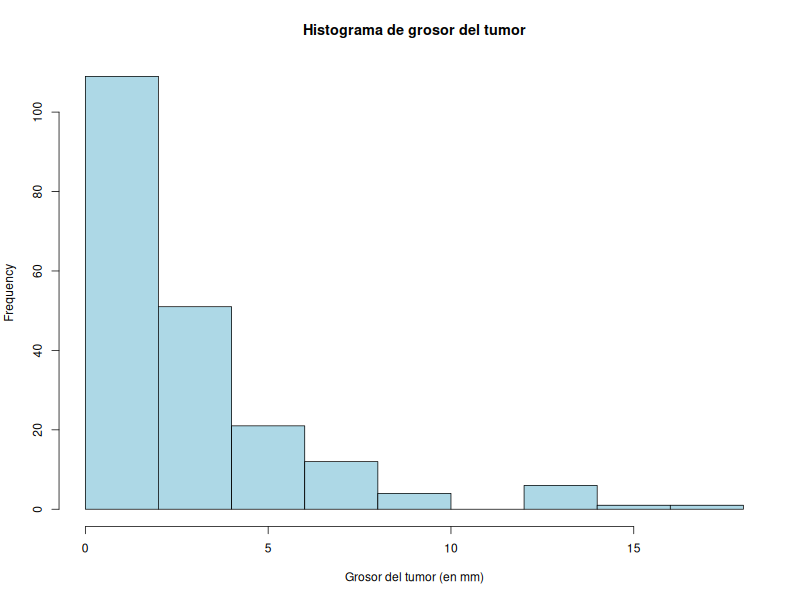

In [26]:
# Histogramas de las variables cuantitativas

# Histograma para la variable "thickness"
hist(Melanoma$thickness,
     main="Histograma de grosor del tumor",
     xlab="Grosor del tumor (en mm)",
     col="lightblue",
     border="black",
     breaks=10)

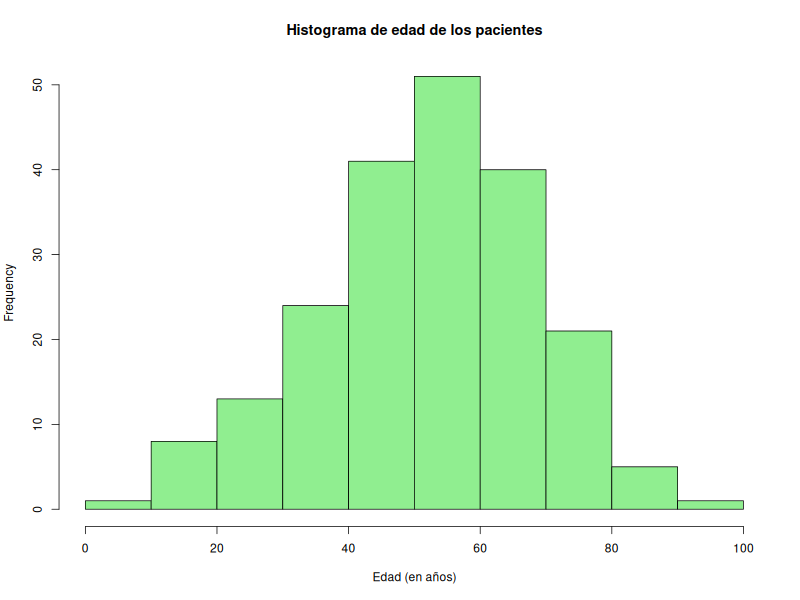

In [27]:
# Histograma para la variable "age"
hist(Melanoma$age,  
     main="Histograma de edad de los pacientes", 
     xlab="Edad (en años)", 
     col="lightgreen", 
     border="black", 
     breaks=10)

También podemos graficar el resto de variable no cuantitativas del conjunto de datos Melanoma, utilizando gráficos de barras.

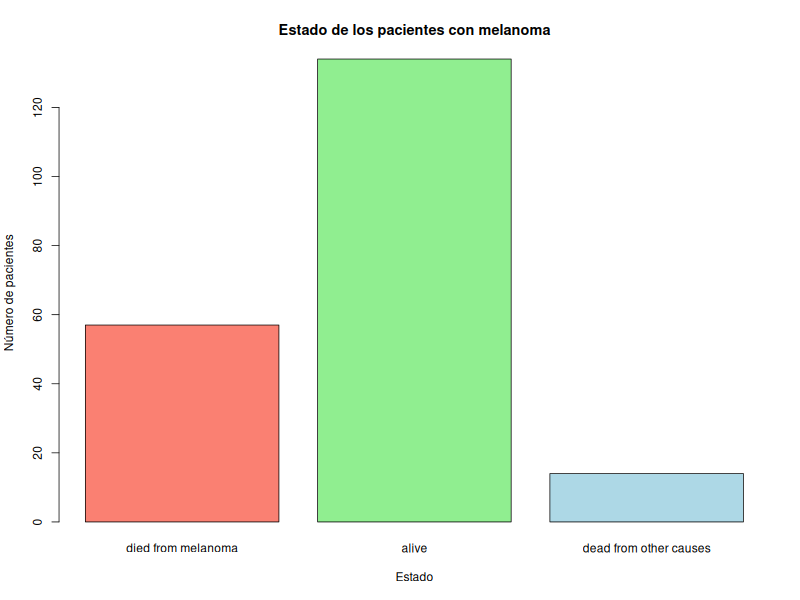

In [28]:
# Gráfico de barras para el estado del paciente (status)
barplot(table(Melanoma$status2),
        main="Estado de los pacientes con melanoma",
        xlab="Estado",
        ylab="Número de pacientes",
        col=c("salmon", "lightgreen", "lightblue"))
        

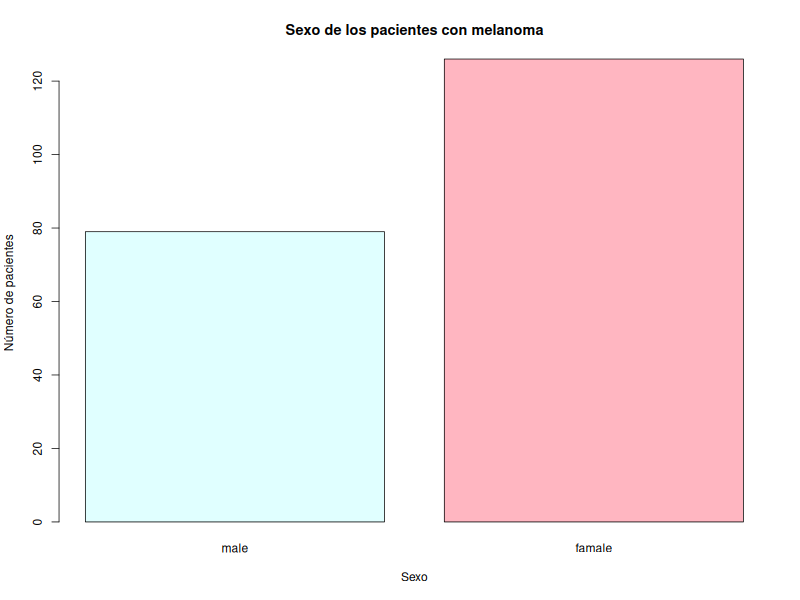

In [30]:
# Gráfico de barras para el sexo de los pacientes
barplot(table(Melanoma$sex),
        main="Sexo de los pacientes con melanoma",
        xlab="Sexo",
        ylab="Número de pacientes",
        col=c("lightcyan", "lightpink"))

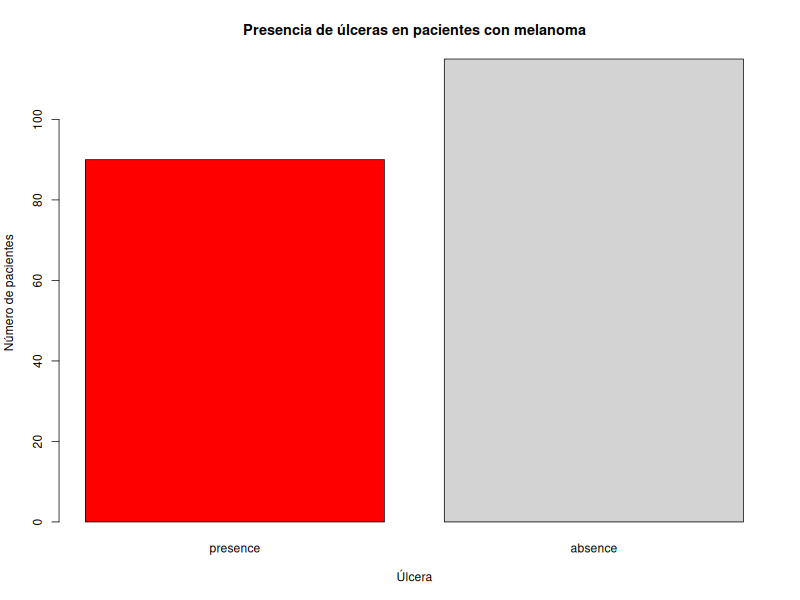

In [32]:
# Gráfico de barras para la presencia de úlceras
barplot(table(Melanoma$ulcer),  
        main="Presencia de úlceras en pacientes con melanoma", 
        xlab="Úlcera", 
        ylab="Número de pacientes", 
        col=c("red", "lightgray"))

In [35]:
Paleta <- c("#800000FF", "#D6D6CEFF", "#FFB547FF", "#ADB17DFF", "#5B8FA8FF",
            "#B1746FFF", "#8A8B79FF", "#725663FF")

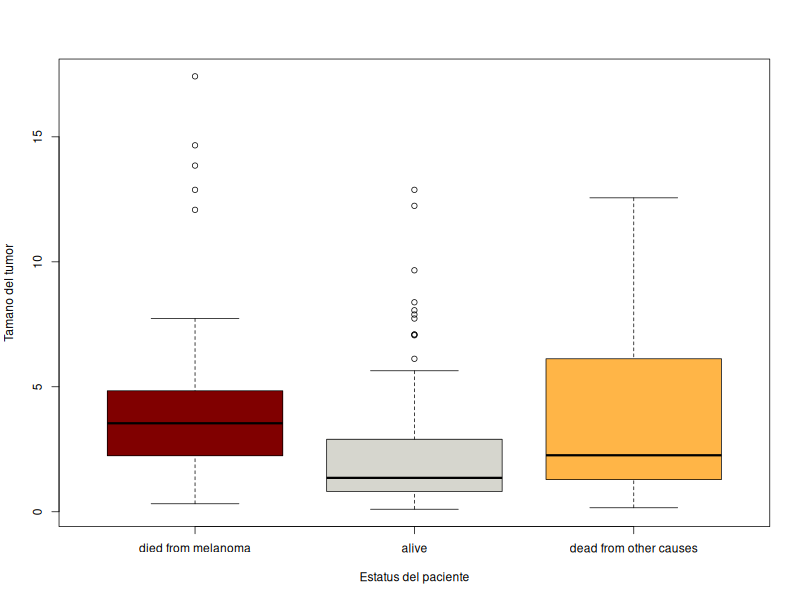

In [40]:
boxplot(Melanoma$thickness~Melanoma$status2,
                 ylab="Tamano del tumor", xlab="Estatus del paciente",
          col=Paleta)

Esta última gráfica contrasta si el tamaño del tumor influye en la muerte del paciente.